In [6]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [7]:
data = pd.read_csv('nba.csv')
data.head()

,﻿球队,13/14常规赛,14/15常规赛,15/16常规赛,16/17常规赛,13/14季后赛,14/15季后赛,15/16季后赛
0,骑士,33,53,57,51,0,14,16
1,猛龙,48,49,56,51,3,0,10
2,热火,54,37,48,41,13,0,7
3,老鹰,38,60,48,43,3,8,4
4,凯尔特人,25,40,48,53,0,0,2


In [8]:
minmax_scaler = MinMaxScaler()
# 标准化数据
X = minmax_scaler.fit_transform(data.iloc[:,1:])
X[:5]

array([[0.38297872, 0.7254902 , 0.74603175, 0.65957447, 0.        ,
        0.875     , 1.        ],
       [0.70212766, 0.64705882, 0.73015873, 0.65957447, 0.1875    ,
        0.        , 0.625     ],
       [0.82978723, 0.41176471, 0.6031746 , 0.44680851, 0.8125    ,
        0.        , 0.4375    ],
       [0.4893617 , 0.8627451 , 0.6031746 , 0.4893617 , 0.1875    ,
        0.5       , 0.25      ],
       [0.21276596, 0.47058824, 0.6031746 , 0.70212766, 0.        ,
        0.        , 0.125     ]])

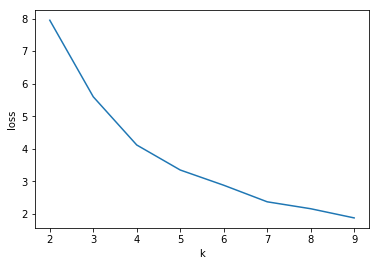

In [9]:
# 肘部法则
loss = []
for i in range(2,10):
    model = KMeans(n_clusters=i).fit(X)
    loss.append(model.inertia_)
    
plt.plot(range(2,10),loss)
plt.xlabel('k')
plt.ylabel('loss')
plt.show()

In [10]:
k = 4
model = KMeans(n_clusters=k).fit(X)

# 将标签整合到原始数据上
data['clusters'] = model.labels_

data.head()

,﻿球队,13/14常规赛,14/15常规赛,15/16常规赛,16/17常规赛,13/14季后赛,14/15季后赛,15/16季后赛,clusters
0,骑士,33,53,57,51,0,14,16,3
1,猛龙,48,49,56,51,3,0,10,0
2,热火,54,37,48,41,13,0,7,0
3,老鹰,38,60,48,43,3,8,4,2
4,凯尔特人,25,40,48,53,0,0,2,1


In [11]:
for i in range(k):
    print('clusters:',i)
    label_data = data[data['clusters'] == i].iloc[:,0]
    print(label_data.values)

clusters: 0
['猛龙' '热火' '步行者' '马刺' '雷霆']
clusters: 1
['凯尔特人' '黄蜂' '活塞' '魔术' '雄鹿' '尼克斯' '篮网' '76人' '爵士' '国王' '掘金' '鹈鹕' '森林狼'
 '太阳' '湖人']
clusters: 2
['老鹰' '公牛' '奇才' '快船' '开拓者' '小牛' '灰熊' '火箭']
clusters: 3
['骑士' '勇士']
